HW 10 Clustering Business

In [28]:
import numpy as np
import pylab as pl
import pandas as pd
#import kmseg
import sklearn.cluster
import geopandas as gp
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans
import os
import scipy
import zipfile #i am not giving it a name cause i intend to use it only once
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [29]:
#get and prep data
#download census data
#$ for ((y=93; y<=99; y+=1)); do wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp$y\totals.zip; done
#$ for ((y=0; y<=9; y+=1)); do wget ftp://ftp.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done
#$ for ((y=10; y<=15; y+=1)); do wget ftp://ftp.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done
#download and read in geojson file
import urllib2
import json
url = "https://nycdatastables.s3.amazonaws.com/2013-08-19T18:18:28.877Z/nyc-zip-code-tabulation-areas-polygons.geojson"
request = urllib2.urlopen(url)
nyc = json.load(request)

In [30]:
nyczip = []
for department in nyc['features']:
    nyczip.append(str(department['properties']["postalCode"]))

In [38]:
ffname = "zbp{0}totals.zip"
biz_zip = set()
for i in range(1994,2014):
    if i in range(1998,2003):
        st = str(i)[2:]
        fname = ffname.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'ZIP':str})
        df.columns=[u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est']
    else:
        st = str(i)[2:]
        fname = ffname.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'zip':str})
    new_zip = set(df.zip).intersection(set(nyczip))
    biz_zip = biz_zip.union(new_zip)

In [39]:
biz_zip = sorted(biz_zip)
biz_data_est = pd.DataFrame(np.nan,index=biz_zip,columns=tr0)

In [40]:
for i in range(1994,2014):
    if i in range(1998,2003):
        st = str(i)[2:]
        fname = ffname.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'ZIP':str})
        df.columns=[u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est']
    else:
        st = str(i)[2:]
        fname = ffname.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'zip':str})
    for j in biz_zip:
        if j in list(set(df.zip)):
            biz = df[df.zip==j]
            biz_data_est.loc[j][i]=int(biz.est)

In [41]:
biz_data_est = biz_data_est.dropna()

In [46]:
result = biz_data_est.copy()
for i in range(len(biz_data_est)):
    result.iloc[i] = (result.iloc[i]-np.mean(result.iloc[i]))/np.std(result.iloc[i])

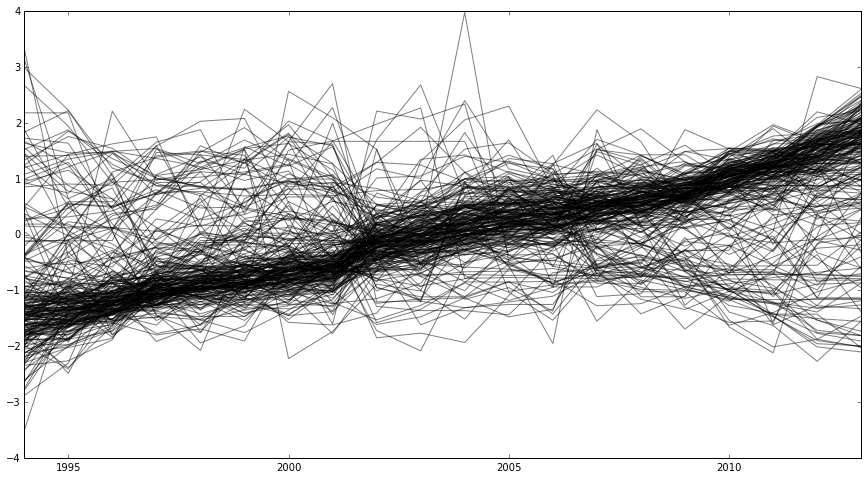

In [48]:
plt.figure(figsize=(15,8))
plt.xlim(1994,2013)
for i in range(len(result)):
    plt.plot(result.iloc[i].index, result.iloc[i], 'k', alpha=0.5)


In [49]:
np.asarray(result)
shape(result)

(230, 20)